# Loading Libraries

Once you have installed a package (easiest way is to use the command pip3 install package_name in the Console), you can load the library in your workspace as follows. Often, people use abbreviations for package names so that they can reference them more easily when calling functions. Note: if you installed Python using Anaconda, then you probably already have these packages installed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
#this last line will cause graphics to be printed in-line
%matplotlib inline

# NumPy
Numpy is a library in Python that allows manipulation of vectors and arrays in a way that is more similar to R (so you can do element-wise operations, matrix math, etc.)

## NumPy Arrays

NumPy arrays are N-dimensional arrays that contain data. A one dimensional NumPy array is very similar to a Python list.

In [7]:
#create a numpy array
print(np.array([1,2,3]))

[1 2 3]


In [8]:
heights = [1.71, 1.62, 1.74]
weights = [65.1, 59.4, 63.9]
np_heights = np.array(heights)
np_weights = np.array(weights)
# note that we can do element-wise operations like R vectors
# meanwhile, bmis = heights / weights ** 2 would throw an error
bmis = np_weights / np_heights ** 2 #all good

#print rounded bmis
print(bmis.round(2))

[22.26 22.63 21.11]


NumPy also allows you to subset using conditionals, like in R

In [10]:
numbers = [1,2,3,4,5]
np_numbers = np.array(numbers)
print(np_numbers > 3)
print(np_numbers[np_numbers > 3])

[False False False  True  True]
[4 5]


Here is an example of a 2-D NumPy array

In [12]:
np_2d = np.array([[1,2,3,4,5],
                  [10,9,8,7,6]])
print(np_2d)

[[ 1  2  3  4  5]
 [10  9  8  7  6]]
(2, 5)


In [15]:
#note: shape is an attribute, not a method
#gives number of rows, then columns
print(np_2d.shape)

nrow, ncol = np_2d.shape
print(nrow)
print(ncol)

(2, 5)
2
5


### Subsetting a (2D) NumPy Array

In [16]:
print(np_2d[0]) #first row
print(np_2d[0][1]) #first row, second column
print(np_2d[0,1]) #same thing

#other examples:
print(np_2d[:,1]) #second column
print(np_2d[:,1:3]) #all rows, columns 2-3
print(np_2d[0,:]) #row 1, all columns

[1 2 3 4 5]
2
2
[2 9]
[[2 3]
 [9 8]]
[1 2 3 4 5]


### Basic Summary Stats from NumPy Arrays

In [17]:
#mean and median
print(np.mean(np_2d[0,:])) #mean of first row
print(np.median(np_2d[:,1])) #median of second column

3.0
5.5


# Pandas
Pandas is another Python library that was built to work on-top of NumPy, which provides a dataframe object, like in R

### Pandas DataFrame

You can create a data frame in Pandas using a dictionary object as follows:  

In [2]:
#First, load pandas as "pd"
import pandas as pd

In [72]:
borough = ['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
population =  [1432132, 2582830, 1628701, 2278906, 476179]
sq_miles = [42, 71, 23, 109, 58]
dict = { 'borough':borough, 'pop':population, 'sq_miles':sq_miles }
nyc = pd.DataFrame(dict)
print(nyc)

         borough      pop  sq_miles
0      The Bronx  1432132        42
1       Brooklyn  2582830        71
2      Manhattan  1628701        23
3         Queens  2278906       109
4  Staten Island   476179        58


In [73]:
#two different ways to access the borough column:
print(nyc['borough'])
print(nyc.borough)

0        The Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: borough, dtype: object
0        The Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: borough, dtype: object


In [74]:
#create a new column: density, which is pop/sq_mi
nyc['density'] = round(nyc['pop']/nyc['sq_miles'])

In [75]:
#set borough column to be the row name
nyc = nyc.set_index('borough')
print(nyc)

                   pop  sq_miles  density
borough                                  
The Bronx      1432132        42  34098.0
Brooklyn       2582830        71  36378.0
Manhattan      1628701        23  70813.0
Queens         2278906       109  20907.0
Staten Island   476179        58   8210.0


We can now access specific rows and columns using either their names and the .loc( ) method, or their index and the .iloc( ) method as follows: 

In [76]:
#pop column, all rows
nyc.loc[:,'pop']

borough
The Bronx        1432132
Brooklyn         2582830
Manhattan        1628701
Queens           2278906
Staten Island     476179
Name: pop, dtype: int64

In [77]:
#pop and sq_miles column, all rows
nyc.loc[:,('pop','sq_miles')]

,pop,sq_miles
borough,,
The Bronx,1432132,42
Brooklyn,2582830,71
Manhattan,1628701,23
Queens,2278906,109
Staten Island,476179,58


In [78]:
#pop, sq_miles columns, Brooklyn and Manhattan rows
nyc.loc[('Brooklyn', 'Manhattan'),('pop','sq_miles')]

,pop,sq_miles
borough,,
Brooklyn,2582830,71
Manhattan,1628701,23


In [79]:
# queens and staten island rows, all columns
nyc.loc[('Queens', 'Staten Island'),:]

,pop,sq_miles,density
borough,,,
Queens,2278906,109,20907.0
Staten Island,476179,58,8210.0


In [83]:
#rows from Bronx through Manhattan
nyc.loc['The Bronx':'Manhattan']

,pop,sq_miles,density
borough,,,
The Bronx,1432132,42,34098.0
Brooklyn,2582830,71,36378.0
Manhattan,1628701,23,70813.0


In [84]:
#first three rows, using index
nyc.iloc[0:3,]

,pop,sq_miles,density
borough,,,
The Bronx,1432132,42,34098.0
Brooklyn,2582830,71,36378.0
Manhattan,1628701,23,70813.0


In [88]:
#first three rows, first two columns
nyc.iloc[0:3,1:3]

,sq_miles,density
borough,,
The Bronx,42,34098.0
Brooklyn,71,36378.0
Manhattan,23,70813.0


In [93]:
#first, second, 4th rows, first and 3rd columns
nyc.iloc[[0,1,3],[0,2]]

,pop,density
borough,,
The Bronx,1432132,34098.0
Brooklyn,2582830,36378.0
Queens,2278906,20907.0


In [106]:
#we can also index rows using conditional statements as follows:
nyc[(nyc['density']>30000) & (nyc['sq_miles']<50)]

,pop,sq_miles,density
borough,,,
The Bronx,1432132,42,34098.0
Manhattan,1628701,23,70813.0


# Basic Data Analysis
The best way to see how NumPy, Pandas, MatplotLib, and other libraries can work together is by running a basic analysis of a real dataset. 

In [4]:
#first, read in "births" dataset
births = pd.read_csv('births.csv')

In [5]:
#look at first five rows
births.head(5)

,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke
0,31.0,30,39,full term,13.0,1.0,6.88,male,smoker
1,34.0,36,39,full term,5.0,35.0,7.69,male,nonsmoker
2,36.0,35,40,full term,12.0,29.0,8.88,male,nonsmoker
3,41.0,40,40,full term,13.0,30.0,9.00,female,nonsmoker
4,42.0,37,40,full term,NaN,10.0,7.94,male,nonsmoker


In [6]:
births.shape

(150, 9)

In [110]:
#amount of missing data by column
births.isnull().sum()

fAge         31
mAge          0
weeks         0
premature     0
visits        1
gained        2
weight        0
sexBaby       0
smoke         0
dtype: int64

In [115]:
#total amount of missing cells
births.isnull().sum().sum()

34

In [7]:
#for now, I'm going to delete these rows,
#but better would be to impute the missing data
#note: axis=0 means drop rows with nas, axis=1 would drop columns with nas
births = births.dropna(axis=0)

In [121]:
#note that 34 rows have been dropped
births.shape

(117, 9)

In [8]:
#unique values of "premature" column
unique_prem = list(set(births['premature']))
unique_prem

['premie', 'full term']

In [9]:
#unique values of "smoker" column
unique_smoke = list(set(births['smoke']))
unique_smoke

['nonsmoker', 'smoker']

In [130]:
#birthweight by smoking status
births.loc[:,('smoke','weight')].groupby('smoke').mean()

,weight
smoke,
nonsmoker,7.189759
smoker,6.929412


It is also possible to use multi-layer indexing to quickly subset the data by categories. See the following example: 

In [10]:
#restrict to just a few columns
births_ind = births.loc[:,('smoke','premature','weight')]

#make smoking status and premature status be indexes
births_ind = births_ind.set_index(['smoke', 'premature'])

#order by index name -- just makes search faster later
births_ind = births_ind.sort_index(level = births_ind.index.names)

#print result
print(births_ind)

                     weight
smoke     premature        
nonsmoker full term    7.69
          full term    8.88
          full term    9.00
          full term    8.75
          full term    7.44
...                     ...
smoker    premie       2.69
          premie       4.75
          premie       4.50
          premie       5.94
          premie       6.31

[117 rows x 1 columns]


In [11]:
#look at birthweights of babies born to smokers who were premature
smoker_premie = births_ind.loc['smoker','premie']
smoker_premie['weight'].head()

smoke   premature
smoker  premie       5.50
        premie       2.69
        premie       4.75
        premie       4.50
        premie       5.94
Name: weight, dtype: float64

Now let's take a moment and visualize this data using matplotlib. Note that the syntax is similar to ggplot: you need to initialize a plot, then add layers on top of the plot.

Text(0.5, 1.0, 'Histogram of Birth Weight')

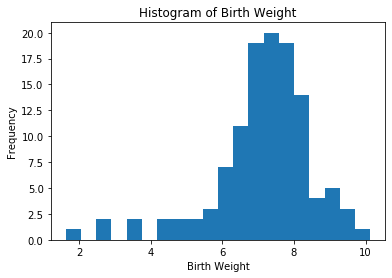

In [12]:
#plot a histogram, again: sort values just speeds up algorithm
plt.hist(births['weight'].sort_values(), bins=20)
plt.ylabel('Frequency')
plt.xlabel('Birth Weight')
plt.title("Histogram of Birth Weight")

Text(0.5, 1.0, 'Birth Weight Distributions by Mother Smoking Status')

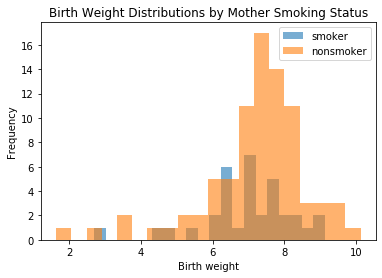

In [146]:
#we can also overlay two histograms as follows
#note: alpha parameter makes the bars more or less see-through
smokers = births_ind.loc['smoker']['weight']
nonsmokers = births_ind.loc['nonsmoker']['weight']

plt.hist(smokers, bins=20, alpha=0.6, label='smoker')
plt.hist(nonsmokers, bins=20, alpha=0.6, label='nonsmoker')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Birth weight')
plt.title("Birth Weight Distributions by Mother Smoking Status")

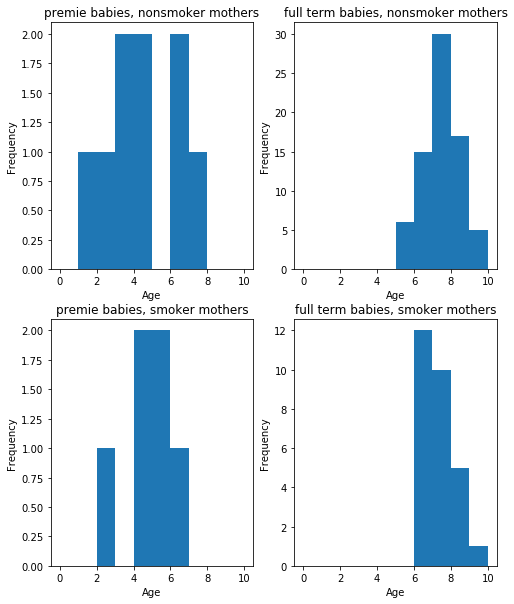

In [152]:
#or by smoking status x premature status
fig = plt.figure(figsize = (8,10))
i = 1
 
for smoke_stat in unique_smoke:
    for prem_stat in unique_prem:
        data = births_ind.loc[smoke_stat,prem_stat]
        ax = fig.add_subplot(2,2,i)
        ax = plt.hist(data['weight'], range=[0, 10])
        ax = plt.ylabel('Frequency')
        ax = plt.xlabel('Age')
        ax = plt.title(prem_stat + " babies, " + smoke_stat + " mothers")
        i = i+1

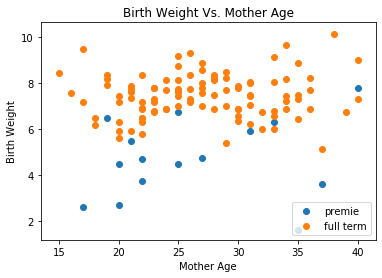

In [160]:
#scatter plot of birth weight vs mother age by prem status
for prem_stat in unique_prem: 
    data = births[(births.premature == prem_stat)]
    plt.scatter(data['mAge'], data['weight'])
plt.ylabel('Birth Weight')
plt.xlabel('Mother Age')
plt.title("Birth Weight Vs. Mother Age")
plt.legend(unique_prem, loc='lower right')

In [14]:
#now, we can use patsy to get a design matrix for a regression formula
#note that patsy returns a tuple: the y vector and X matrix
y, X = patsy.dmatrices('weight ~ mAge + premature + mAge:premature', births)

In [17]:
#take a look at the X matrix
X[0:10,]

array([[ 1.,  0., 30.,  0.],
       [ 1.,  0., 36.,  0.],
       [ 1.,  0., 35.,  0.],
       [ 1.,  0., 40.,  0.],
       [ 1.,  0., 28.,  0.],
       [ 1.,  1., 35., 35.],
       [ 1.,  1., 21., 21.],
       [ 1.,  1., 20., 20.],
       [ 1.,  0., 25.,  0.],
       [ 1.,  1., 19., 19.]])

In [19]:
#run a linear model with this matrix
model1 = sm.OLS(y,X)
results = model1.fit()
print(results.params)

[ 7.11166722 -3.72486715  0.01283277  0.03990327]


In [20]:
#print a summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     28.08
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.21e-13
Time:                        12:49:46   Log-Likelihood:                -172.23
No. Observations:                 117   AIC:                             352.5
Df Residuals:                     113   BIC:                             363.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

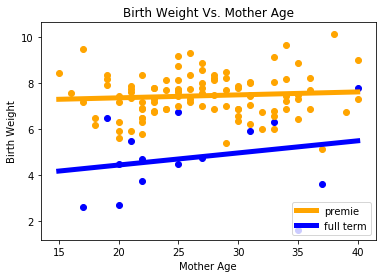

In [42]:
#replot the scatter plot with regression lines
minmage = min(births["mAge"])
maxmage = max(births["mAge"])
xs = np.linspace(minmage, maxmage, 1000)
colors = ["blue", "orange"]
for i, prem_stat in enumerate(unique_prem): 
    data = births[(births.premature == prem_stat)]
    plt.scatter(data['mAge'], data['weight'], color = colors[i])
plt.plot(xs, 
         results.params[0]+results.params[2]*xs, 
         color='orange',
         linewidth=5)
plt.plot(xs, 
         results.params[0:2].sum()+results.params[2:4].sum()*xs, 
         color='blue',
         linewidth=5)
plt.ylabel('Birth Weight')
plt.xlabel('Mother Age')
plt.title("Birth Weight Vs. Mother Age")
plt.legend(unique_prem, loc='lower right')

In [51]:
#you can also use the predict function to predict outcomes for new
#(or old) data
print(results.predict(X[:5]))

[7.49665028 7.5736469  7.56081413 7.62497797 7.47098475]


# Simulation using Python Libraries

Another useful thing to know is how to simulate data in Python. The following walks through an example:

In [54]:
#create a function that works like rnorm
def rnorm(mean, variance, size=1):
    return mean + np.sqrt(variance) * np.random.randn(size)

#set a seed
np.random.seed(12345)

#set N=100
N = 100

#column bind three different lists of 100 random values drawn with rnorm, 
#each with mean 0 and different variances
X = np.c_[rnorm(0, 0.4, size=N),
          rnorm(0, 0.6, size=N),
          rnorm(0, 0.2, size=N)]

#use sm.add_constant to add a column of 1's out front
X_c =  sm.add_constant(X)

#print the first five rows of the result
X_c[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [55]:
#create a vector of random error terms
eps = rnorm(0, 0.1, size=N)

#create a vector of beta coefficients
beta = [5, 1, 3, 9]

#let y = the cross product of X and beta plus some error
y = np.dot(X_c, beta) + eps

#turn the data into a data frame
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])

#add the y column
data['y'] = y

#inspect the first 5 rows of the simulated dataset
data[0:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,6.322820
1,0.302910,-0.435742,-0.254180,1.262107
2,-0.328522,-0.025302,0.138351,5.721122
3,-0.351475,-0.719605,-0.258215,0.056420
4,1.243269,-0.373799,-0.522629,0.538396


In [56]:
#run a linear regression to see how estimated betas compare to true betas
results2 = smf.ols('y ~ col0 + col1 + col2', data=data).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5460.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          4.32e-107
Time:                        16:12:12   Log-Likelihood:                -33.835
No. Observations:                 100   AIC:                             75.67
Df Residuals:                      96   BIC:                             86.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0336      0.035    142.822      0.0